In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def get_metrics(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)**(1/2)
    r2training = model.score(x_train, y_train)
    r2test = model.score(x_test, y_test)
    r2 = r2_score(y_test, y_pred)
    print(model)
    print('R2 of Training:', r2training)
    print('R2 of Test:', r2test)
    print('R2 Score:', r2)
    print('MSE:', mse)
    print('RMSE:', rmse)

    
## Got rid of KNN and Ridge because of scores
def split_and_get_metrics(dataframe):
    df_train, df_test = train_test_split(df, test_size=0.2)
    X_train = df_train.loc[:, ~(df_train.columns).isin(['FollowingYearWeapons'])]
    Y_train = df_train['FollowingYearWeapons']
    X_test = df_test.loc[:, ~(df_test.columns).isin(['FollowingYearWeapons'])]
    Y_test = df_test['FollowingYearWeapons']
    get_metrics(linear, X_train, Y_train, X_test, Y_test)
    get_metrics(lasso, X_train, Y_train, X_test, Y_test)
    get_metrics(gbr, X_train, Y_train, X_test, Y_test)
    get_metrics(rfr, X_train, Y_train, X_test, Y_test)
    
def quick_plots(column):
    norm = np.random.normal(0, 1, len(df))
    norm.sort()
    weap_incidents_sorted = column.sort_values()
    plt.figure(figsize = (20,5))
    plt.subplot(1,2,1)
    plt.plot(norm, column.sort_values(), "o")
    plt.title('QQ Plot')
    
    plt.subplot(1,2,2)
    plt.scatter(x=column, y=df['FollowingYearWeapons'])
    plt.title('Scatter Plot')
    plt.ylabel('Following Year Weapons')
    plt.show()
    
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
knn = KNeighborsRegressor()

In [6]:
df = pd.read_csv('/Users/joshuarkarnad/Desktop/Thinkful/Data/Important Data/WeaponDataV4.csv')
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1.1', 'Unnamed: 0.1'], axis =1)
df.shape

(22277, 147)

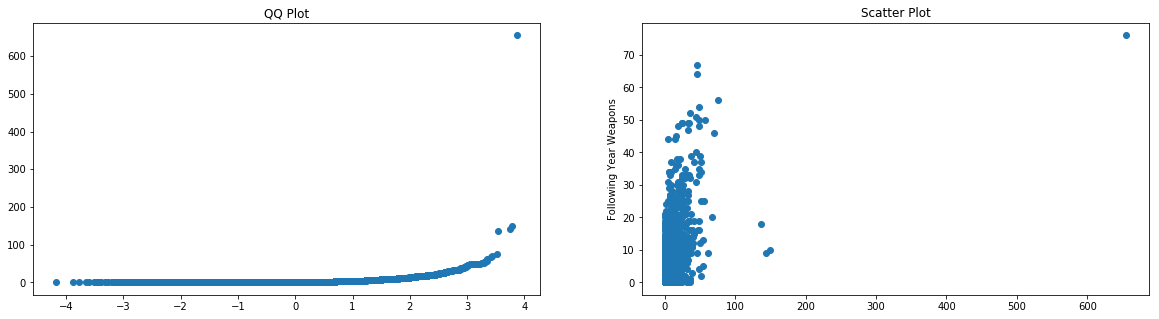

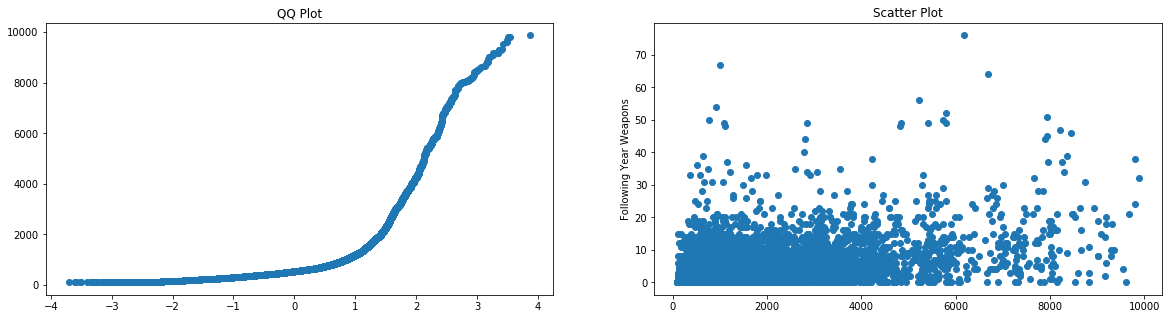

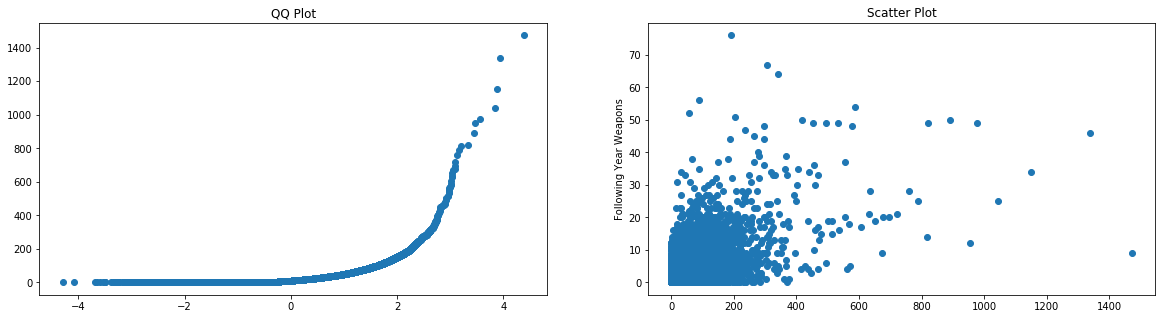

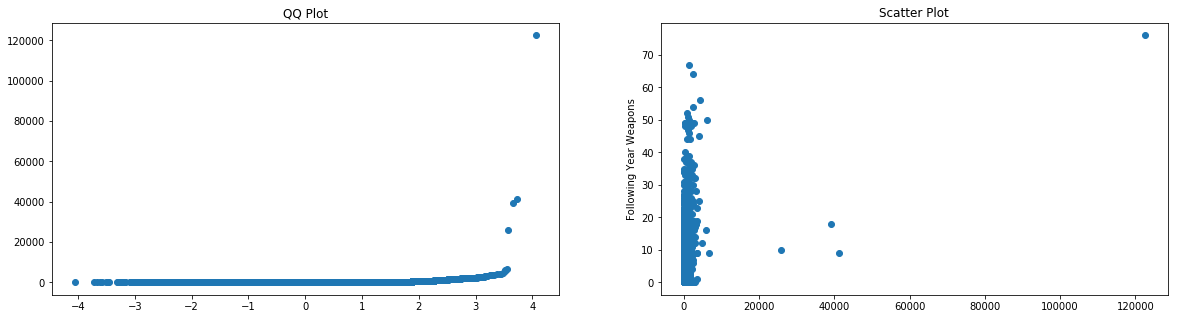

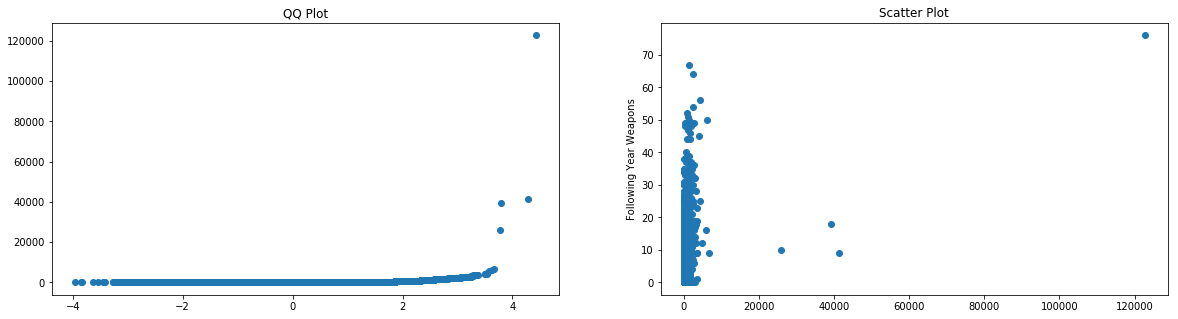

In [7]:
# Removing outliers based on feature importance in Round 3
quick_plots(df['Weapon Incidents'])
quick_plots(df['Enrollment'])
quick_plots(df['Offenders'])
quick_plots(df['Total OSS'])
quick_plots(df['Total OSS Expulsions'])

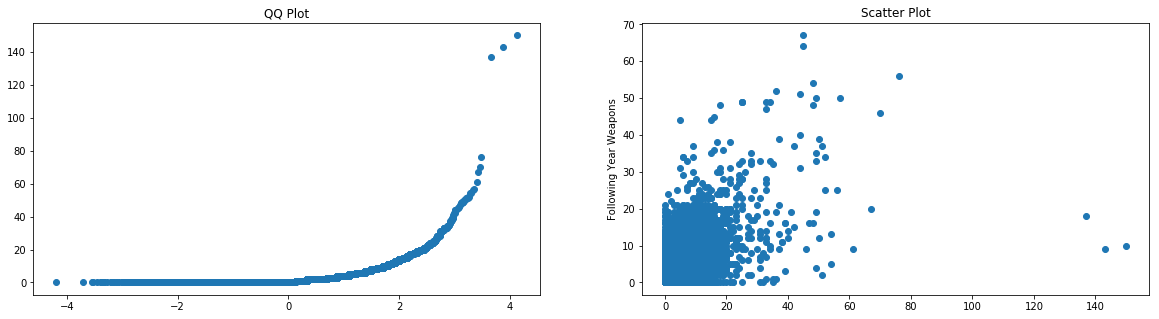

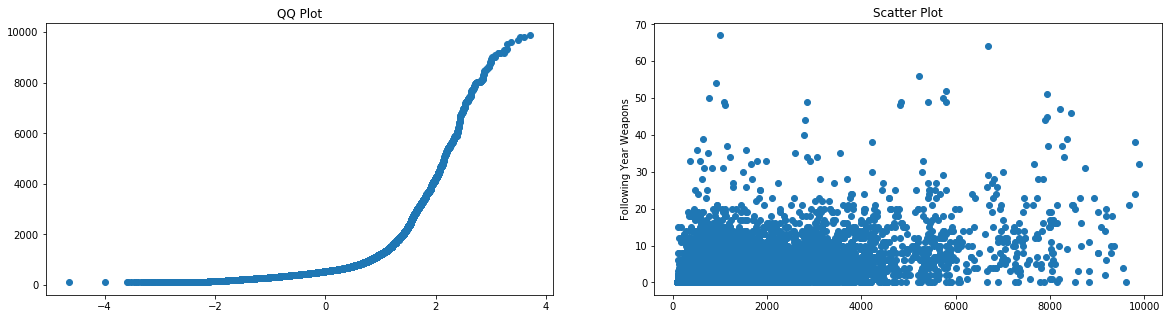

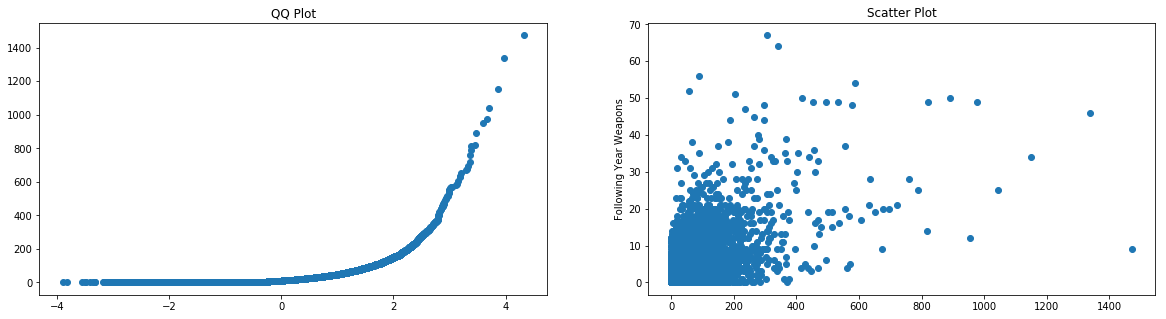

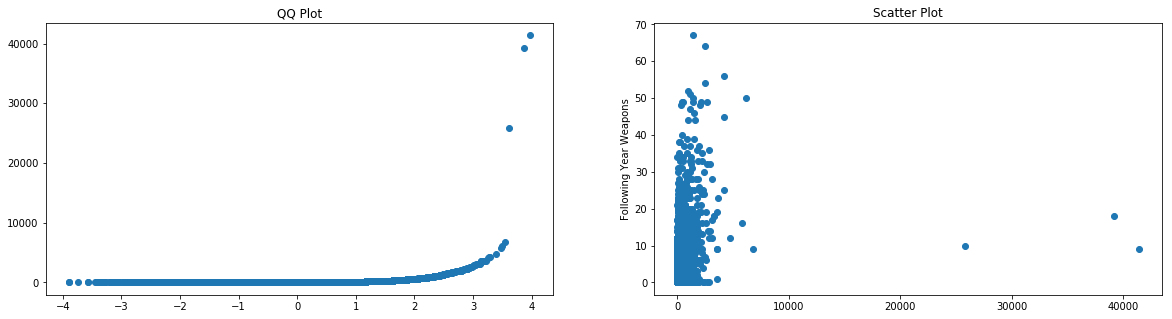

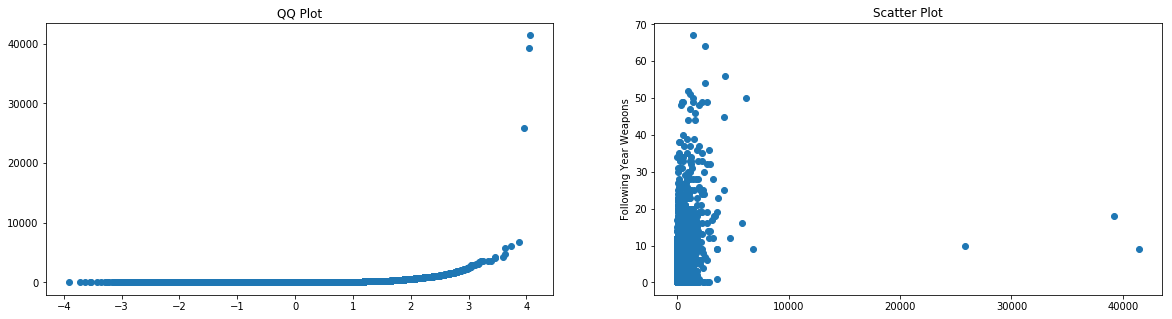

In [8]:
df = df[df['Weapon Incidents'] < 600]
quick_plots(df['Weapon Incidents'])
quick_plots(df['Enrollment'])
quick_plots(df['Offenders'])
quick_plots(df['Total OSS'])
quick_plots(df['Total OSS Expulsions'])

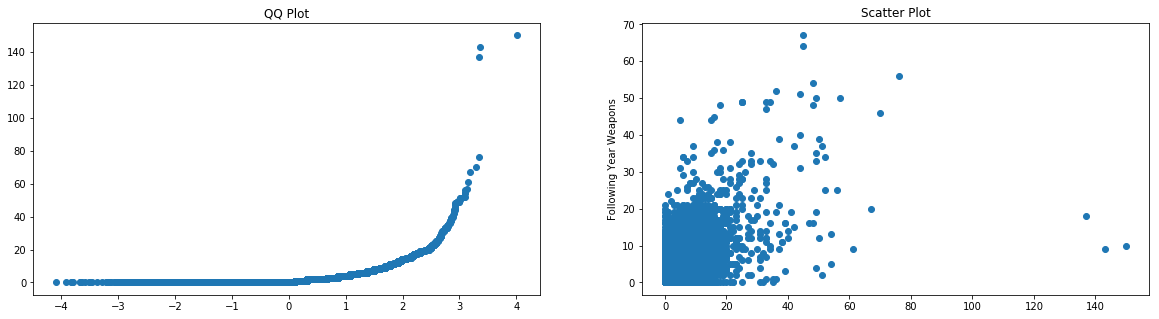

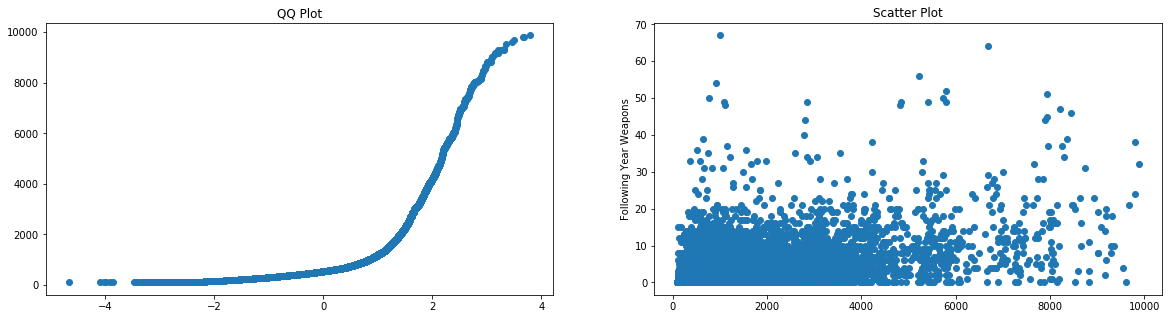

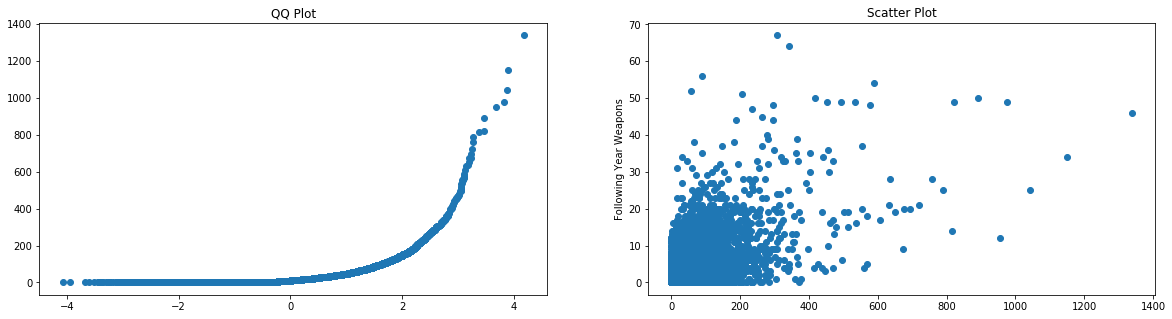

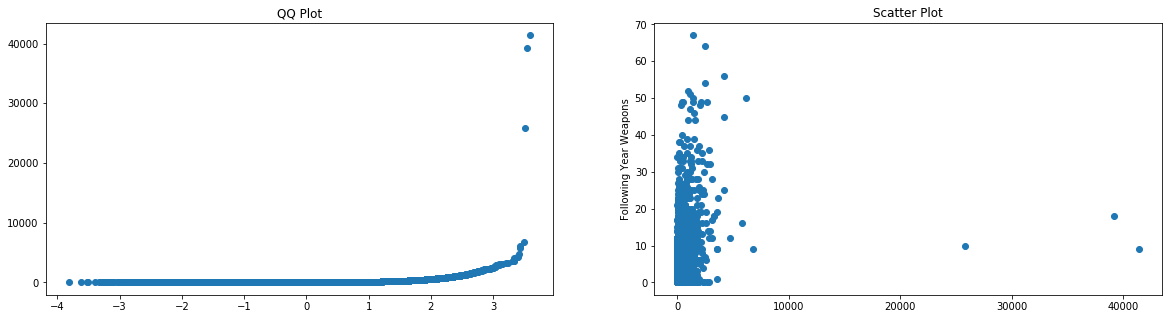

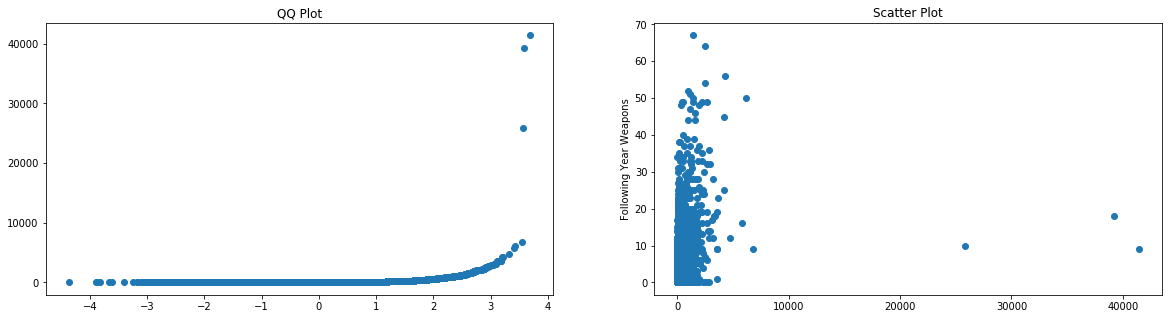

In [9]:
df = df[df['Offenders'] < 1400]
quick_plots(df['Weapon Incidents'])
quick_plots(df['Enrollment'])
quick_plots(df['Offenders'])
quick_plots(df['Total OSS'])
quick_plots(df['Total OSS Expulsions'])

In [10]:
split_and_get_metrics(df)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
R2 of Training: 0.514556916598
R2 of Test: 0.50717986251
R2 Score: 0.50717986251
MSE: 6.57827558747
RMSE: 2.56481492265
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
R2 of Training: 0.480737544776
R2 of Test: 0.495617346709
R2 Score: 0.495617346709
MSE: 6.73261468531
RMSE: 2.59472824884
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
R2 of Training: 0.631972973248
R2 o